In [1]:
# Definisem za svaki od filtera po jednu funkciju, koja prima putanju slike
# Rezultujucu sliku cuva u obliku: orig_ime_ivice.jpg u folderu Rezultat
# Na kraju pravim i figuru koja ce da sadrzi sve rezultate, uporedjene

from PIL import Image as img
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import image as mpimg
import os
import math

%matplotlib inline
plt.style.use ('dark_background')


In [2]:
def primeni_filter (x_filter, y_filter, putanja_slike, ime_filtera, ime_slike):
    
    x_filter = np.array (x_filter)
    y_filter = np.array (y_filter)
    
    slika = img.open (putanja_slike).convert ('L')
    slika_mat = slika.load()
    sirina = slika.size[0]
    visina = slika.size[1]
    
    rez = img.new ('L', (sirina, visina))
    rez_mat = rez.load()
    
    vel_x_filtera = len (x_filter)
    vel_y_filtera = len (y_filter)
    
    # Krecemo se po pikselima i primenjujemo filter
    for red in range (sirina - vel_x_filtera):
        for kolona in range (visina - vel_x_filtera):
            
            Rx = 0
            Ry = 0
            
            for i in range (vel_x_filtera):
                for j in range (vel_y_filtera):
                    
                    tmp = slika_mat [red+i, kolona+j]
                    Rx += x_filter[i][j] * tmp
                    Ry += y_filter[i][j] * tmp
            
            rez_mat[red + 1, kolona + 1] = int (math.sqrt (Rx**2 + Ry**2))
    
    rez.save (os.path.join ('Rezultati', 'Ivice', ime_slike + '_' + ime_filtera + '.jpg'))


In [3]:
def Sobel_filter (putanja_slike, ime_slike):
    
    x_filter = [[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]]
    y_filter = [[1, 2, 1], [0, 0, 0], [-1, -2, -1]]
    primeni_filter (x_filter, y_filter, putanja_slike, 'Sobel', ime_slike)

def Prewitt_filter (putanja_slike, ime_slike):
    
    x_filter = [[-1, 0, 1], [-1, 0, 1], [-1, 0, 1]]
    y_filter = [[1, 1, 1], [0, 0, 0], [-1, -1, -1]]
    primeni_filter (x_filter, y_filter, putanja_slike, 'Prewitt', ime_slike)

def Roberts_filter (putanja_slike, ime_slike):
    
    x_filter = [[1, 0], [0, -1]]
    y_filter = [[0, 1], [-1, 0]]
    primeni_filter (x_filter, y_filter, putanja_slike, 'Roberts', ime_slike)


In [4]:
def poredjenje (lista_filtera):
    
    dir_putanja_rez = os.path.join ('Rezultati', 'Ivice')
    dir_putanja_ulaz = os.path.join ('Slike', 'Ivice slike')
    lista_imena_ulaz = sorted(os.listdir (dir_putanja_ulaz))
    lista_imena_rez = sorted(os.listdir (dir_putanja_rez))
    
    broj_slika = len (lista_imena_rez)
    broj_filtera = len (lista_filtera)
    i = 0  # Brojac originala
    j = 0  # Brojac rezultata
    k = 0  # Globalni brojac
    
    fig, ax = plt.subplots (int(broj_slika / broj_filtera), broj_filtera + 1, figsize = (35, 50))
    
    for ax_i in ax:
        
        for ax_j in ax_i:
            
            if (k % 4 == 0):
                putanja_slike = os.path.join (dir_putanja_ulaz, lista_imena_ulaz[i])
                ax_j.set_title (str.split(lista_imena_ulaz[i], '.')[0])
                i += 1
            
            else:
                putanja_slike = os.path.join (dir_putanja_rez, lista_imena_rez[j])
                ax_j.set_title (str.split(str.split (lista_imena_rez[j], '_')[-1], '.')[0])
                j += 1
            
            
            slika = mpimg.imread (putanja_slike)
            ax_j.imshow (slika, cmap = 'gray')
            ax_j.axis ('off')
            k += 1
    
    plt.show()


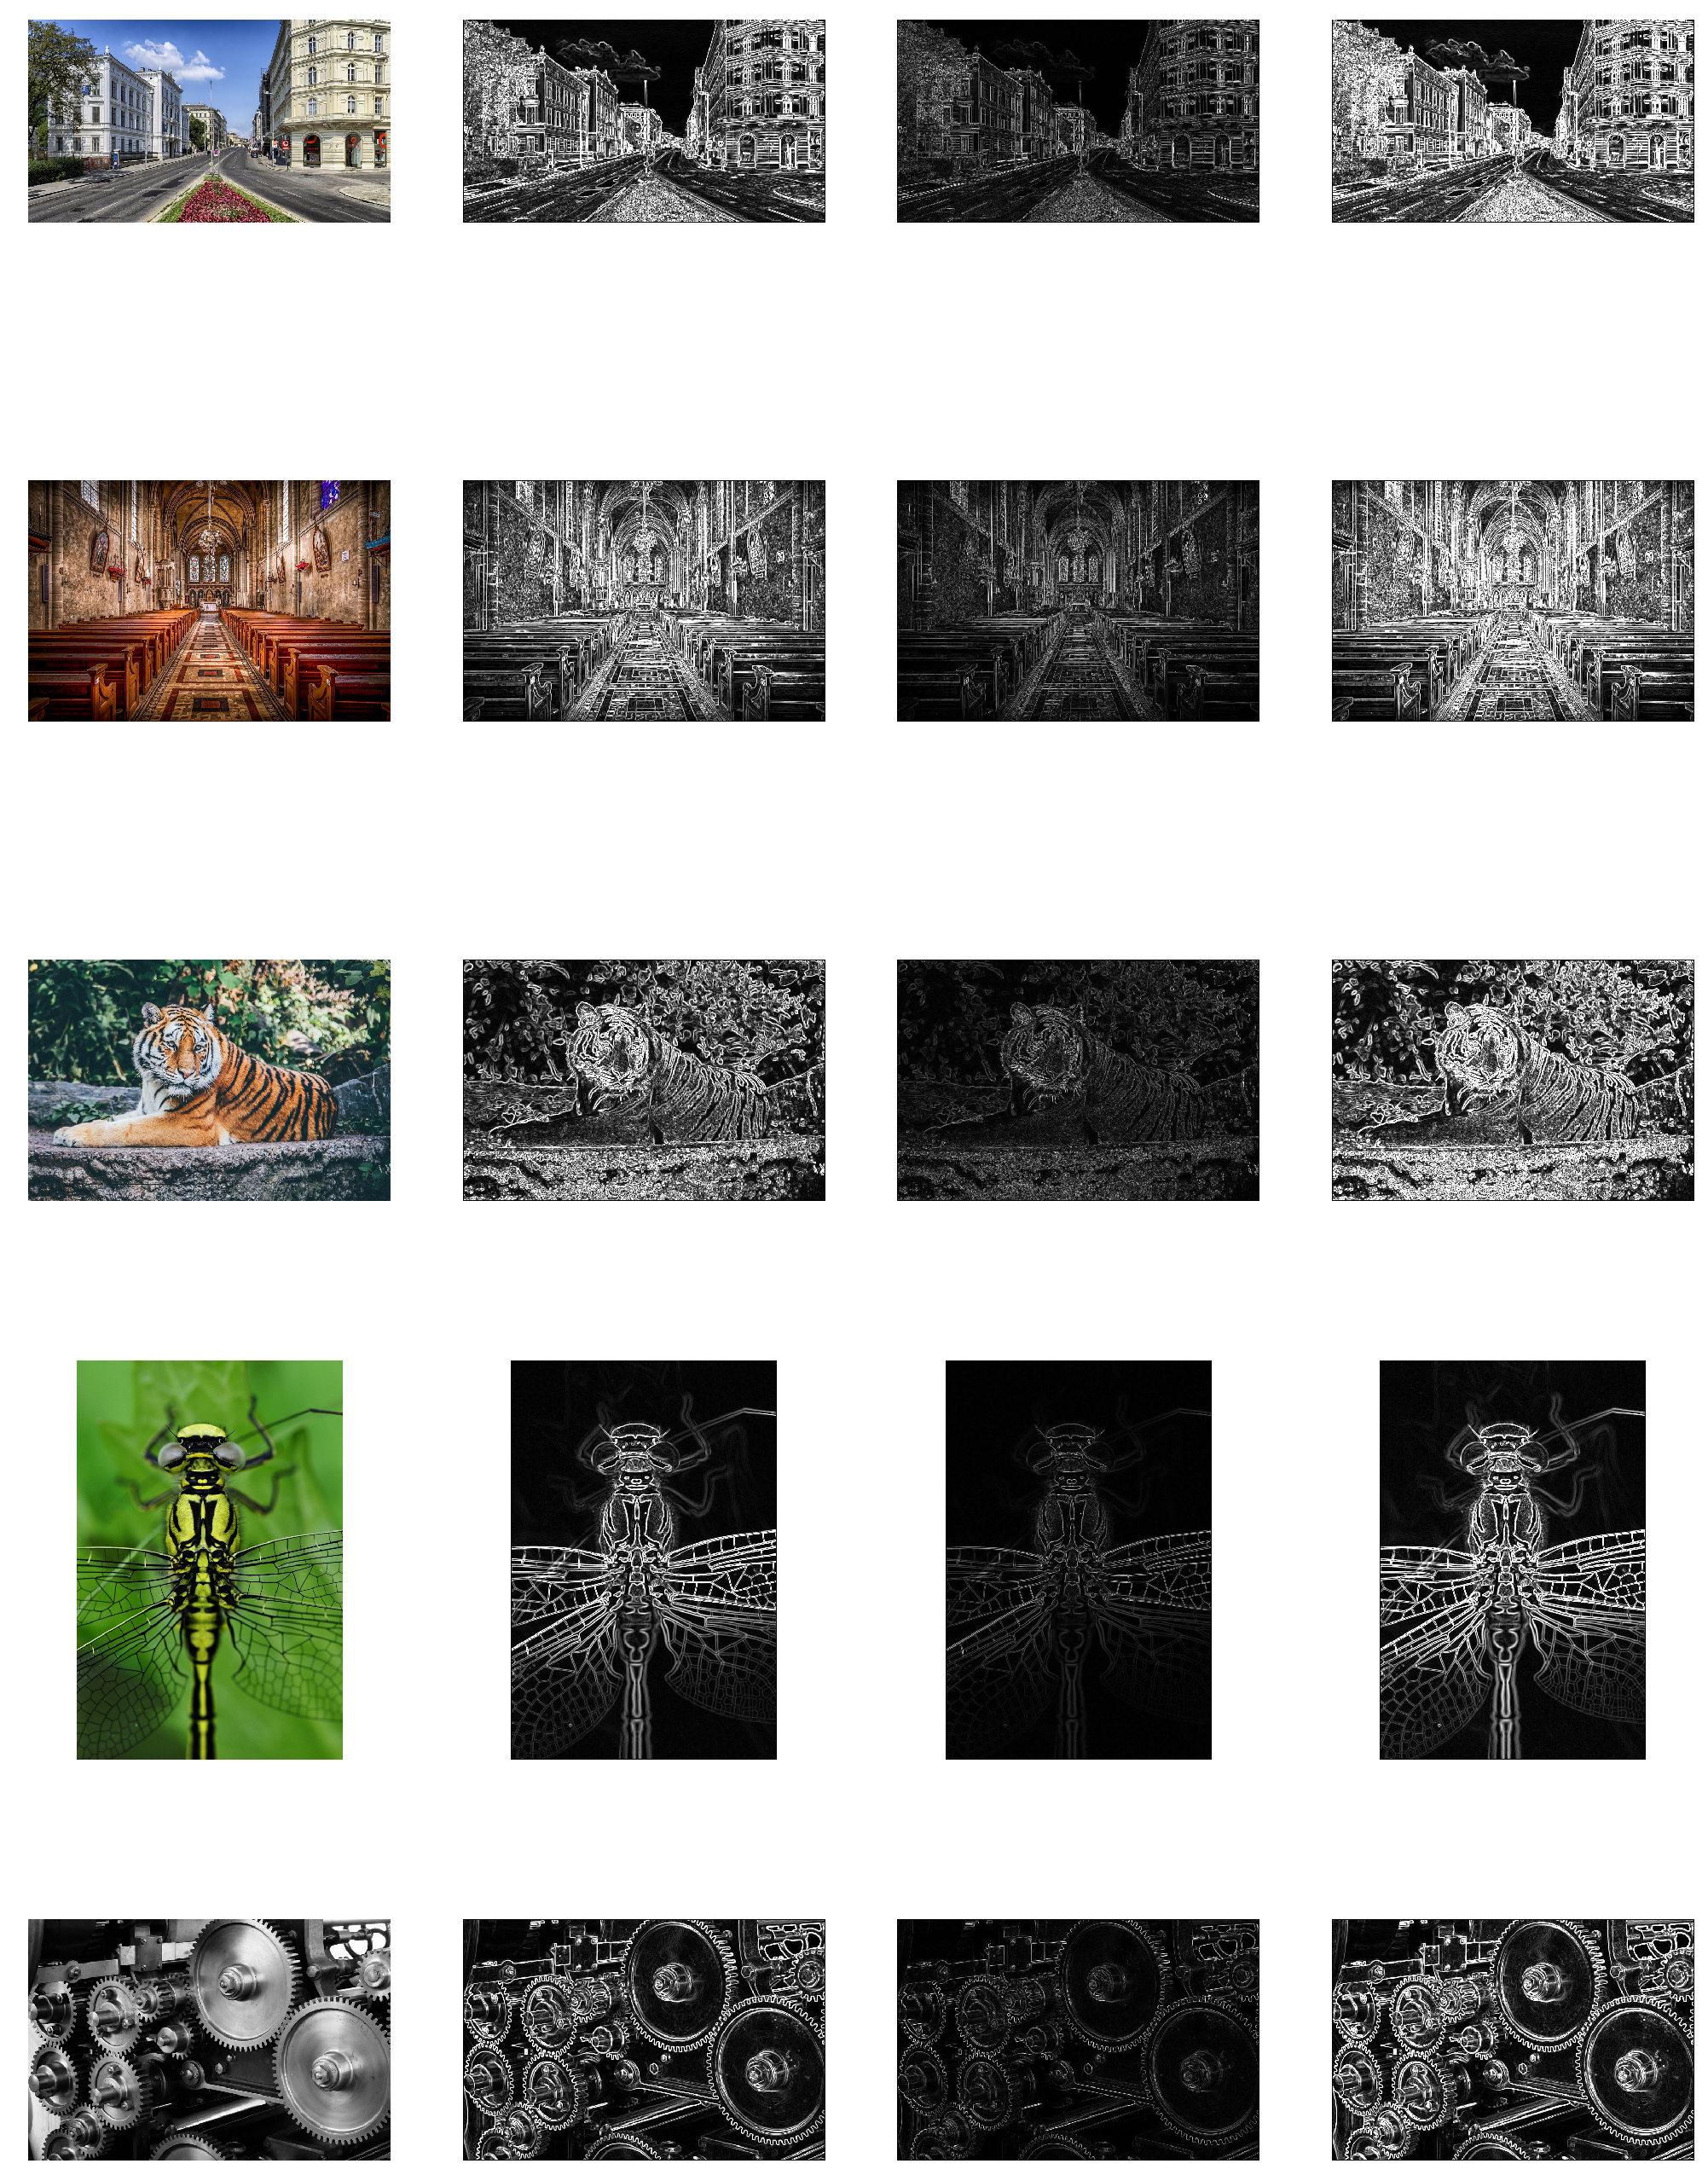

In [5]:
def main():
    
    dir_putanja = os.path.join ('Slike', 'Ivice slike')
    lista_imena = os.listdir(dir_putanja)
    
    for ime_slike in lista_imena:
        if os.path.splitext(ime_slike)[-1] == '.jpg':
            Sobel_filter (os.path.join (dir_putanja, ime_slike), os.path.splitext (ime_slike)[-2])
            Prewitt_filter (os.path.join (dir_putanja, ime_slike), os.path.splitext (ime_slike)[-2])
            Roberts_filter (os.path.join (dir_putanja, ime_slike), os.path.splitext (ime_slike)[-2])
    
    poredjenje (['Sobel', 'Prewitt', 'Roberts'])

if __name__ == '__main__':
    main()
